In [161]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [162]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [163]:
#Assuming Naming would be <DatasetName>_<Iteration_count>.txt
Datasets = ["BreastCancer",
            "BreastEW",
            "CongressEW",
            "Exactly",
            "Exactly2",
            "HeartEW",
            "Ionosphere",
            "KrVsKpEW",
            "Lymphography",
            "M-of-n",
            "PenglungEW",
            "Sonar",
            "SpectEW",
            "Tic-tac-toe",
            "Vote",
            "WaveformEW",
            "Wine"
            ]
#Change the Iteration count according to your need
iteration_count = 100
#give proper location of where the results are stored
res_loc = '/content/gdrive/My Drive/GWO/Results_ArchiveMod/'
"""other assumptions are key value of dictionary would be 'explored','archiveCosts' """

"other assumptions are key value of dictionary would be 'explored','archiveCosts' "

In [164]:
#Assuming Naming would be <DatasetName>_<Iteration_count>.txt
def get_filenames(datasets,i):
  temp = []
  for dataset in datasets:
    name = dataset + "_"+str(i)+".txt"
    temp.append(name)
  return temp

def exploration_progress(exp_res, maxIt, nGrey):
  unique_pos = set()
  unique_it = np.zeros(maxIt)
  for i in range(maxIt):
    for j in range(nGrey):
      pos = str(exp_res[i][j])
      if pos not in unique_pos:
        unique_pos.add(pos)
        unique_it[i] += 1
  return unique_it

def load_results(it,datasets,res_loc):
  results = []
  dataset_file_names = get_filenames(datasets,iteration_count)
  for name in dataset_file_names:
    f = open(res_loc+name,'rb')
    res = pickle.load(f)
    results.append(res)
  return results

def plot_explored(it,datasets,res_loc):
  results = load_results(it,datasets,res_loc)
  len_results = len(results)
  fig = plt.figure(figsize = (30,45))
  x = 3
  y = len_results/x
  n = 1 
  for res in results:
    exploration = exploration_progress(res['explored'],it,8)
    no_of_features = len(res['explored'][0][0])
    fig.add_subplot(y+1,x,n)
    plt.plot(exploration)
    plt.xlabel('iterations')
    plt.ylabel('unique solutions explored')
    plt.title(f'{datasets[n-1]} - [No of Features: {no_of_features}]')
    n+=1
def plot_archivecost(it,datasets,res_loc):
  results = load_results(it,datasets,res_loc)
  len_results = len(results)
  fig = plt.figure(figsize=(30,45))
  x = 3
  y = len_results/x
  n=1
  for res in results:
    archiveCost = res['archiveCosts']
    no_of_features = len(res['explored'][0][0])
    fig.add_subplot(y+1,x,n)
    plt.plot(archiveCost)
    plt.ylabel('Number of Features')
    plt.xlabel('Archive Cost')
    plt.title(f'{datasets[n-1]} - [No of Features: {no_of_features}]')
    n+=1

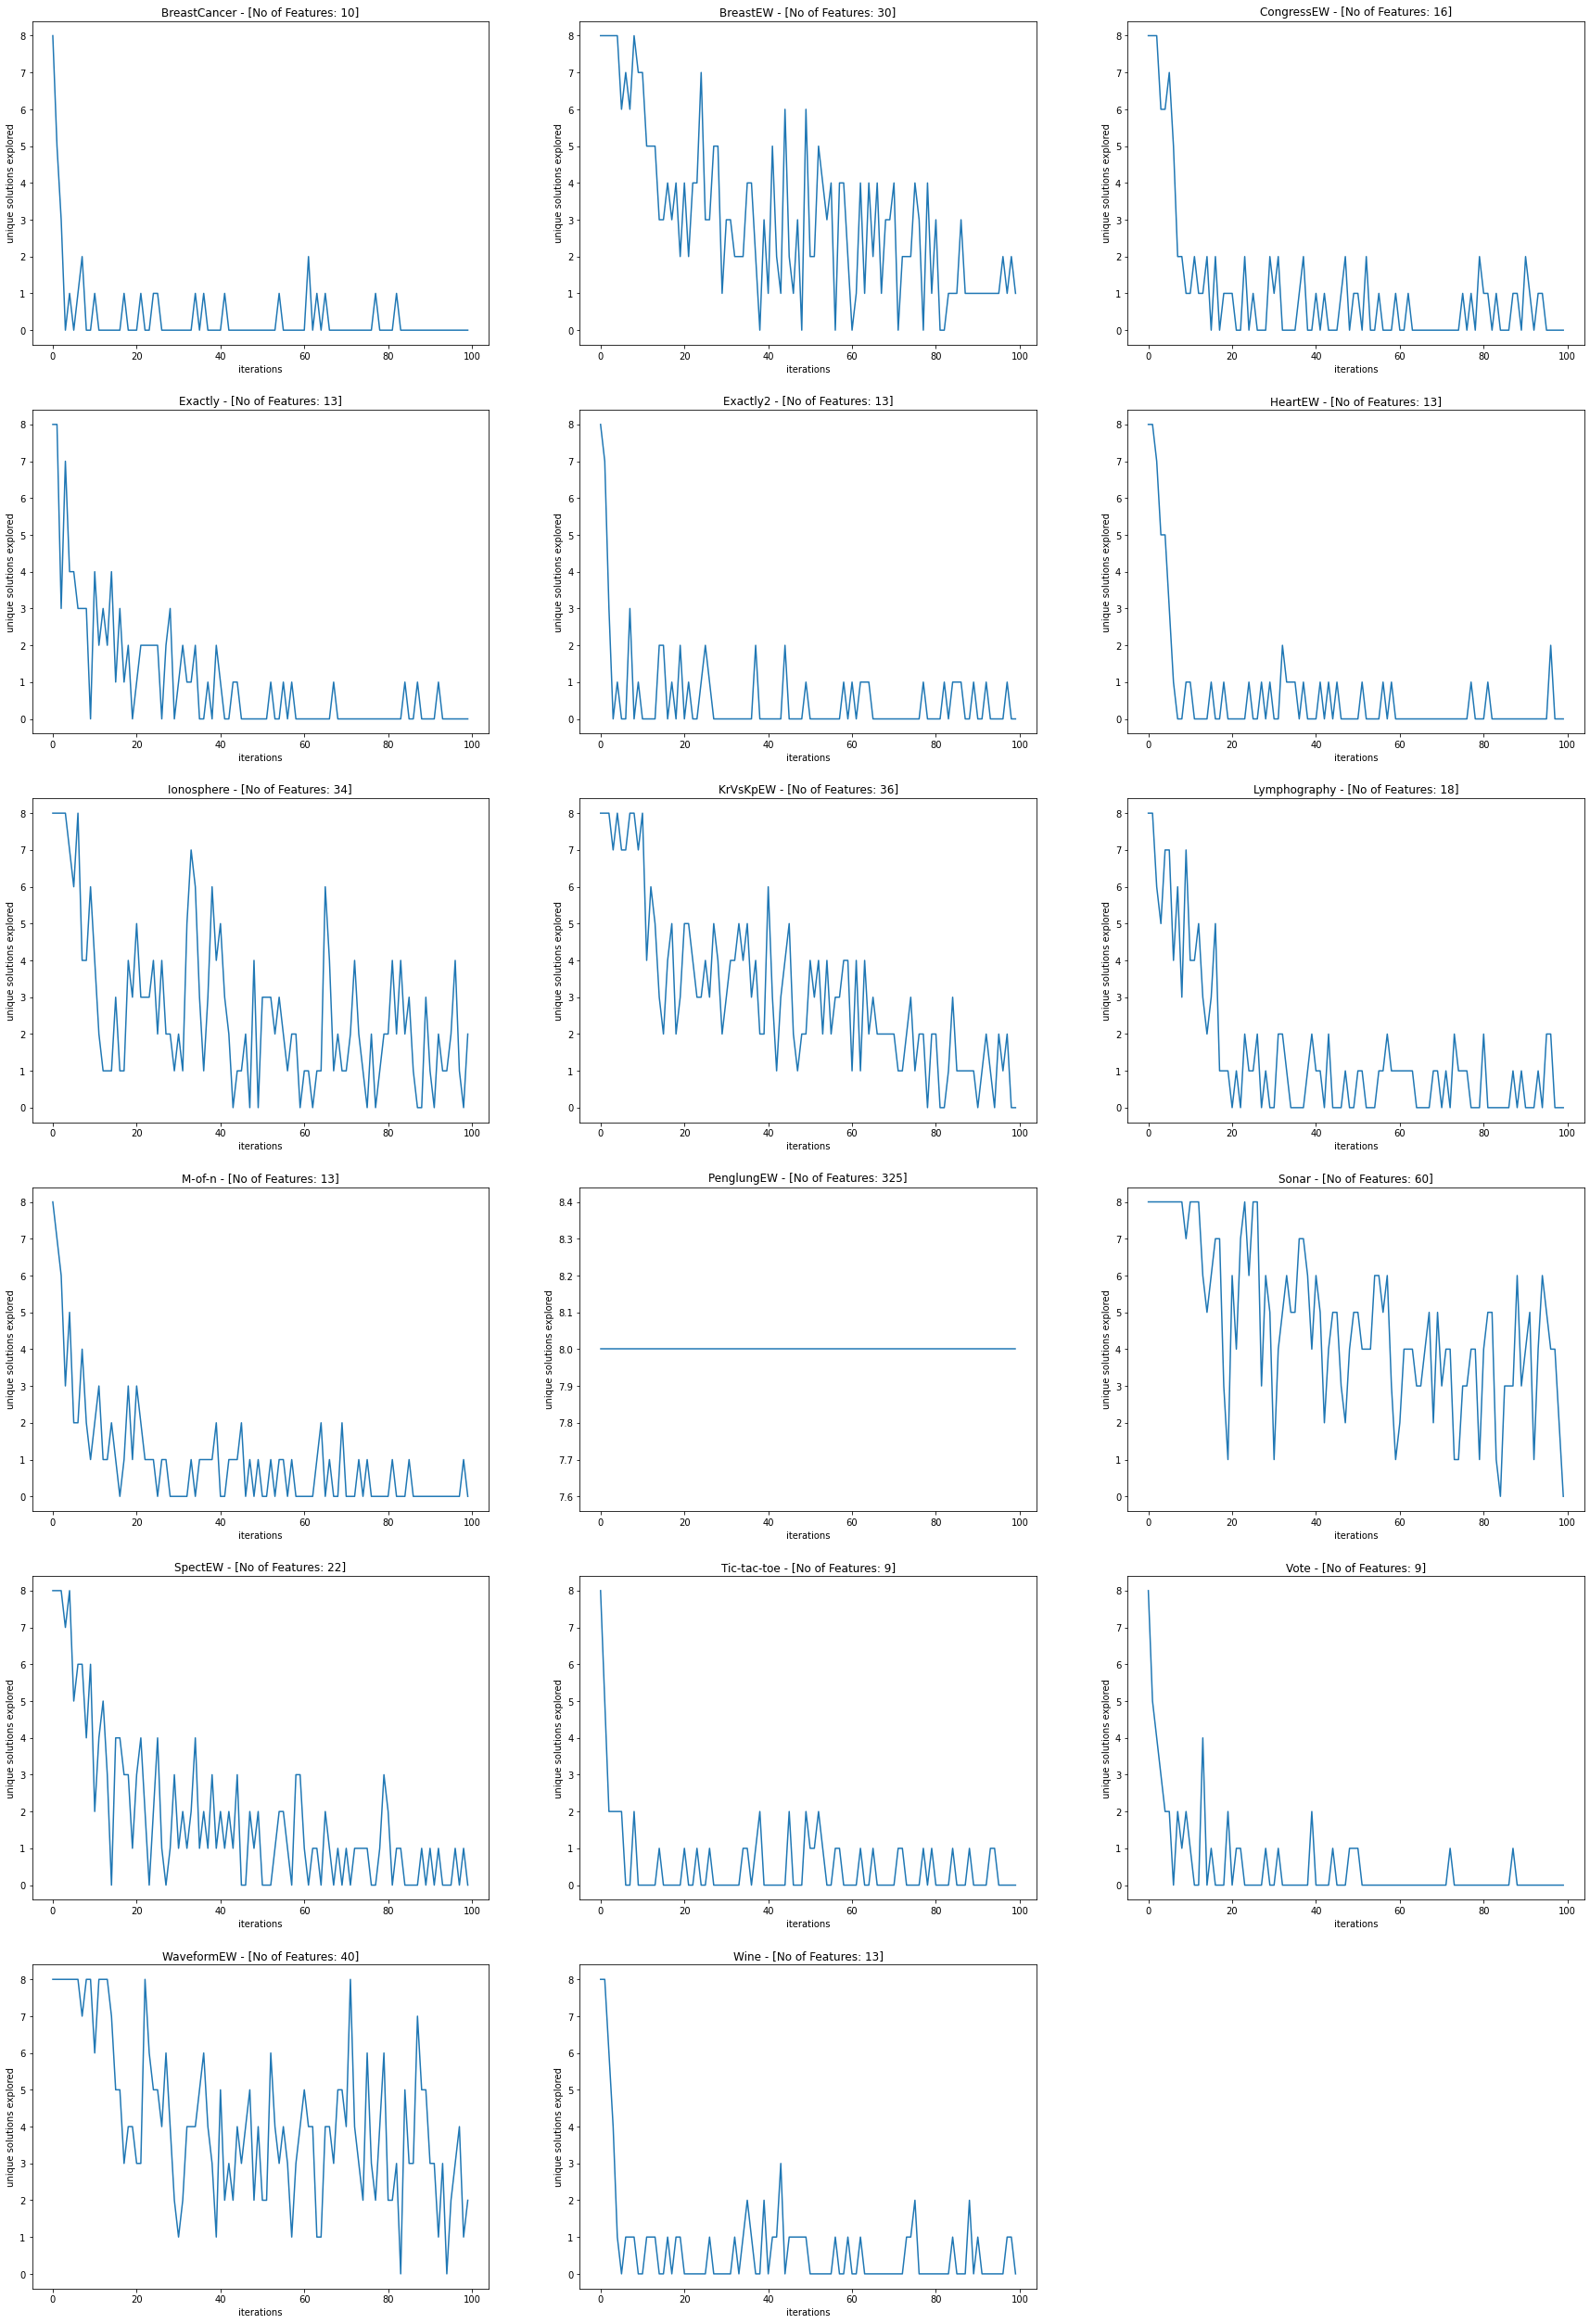

In [165]:
plot_explored(100,Datasets,res_loc)

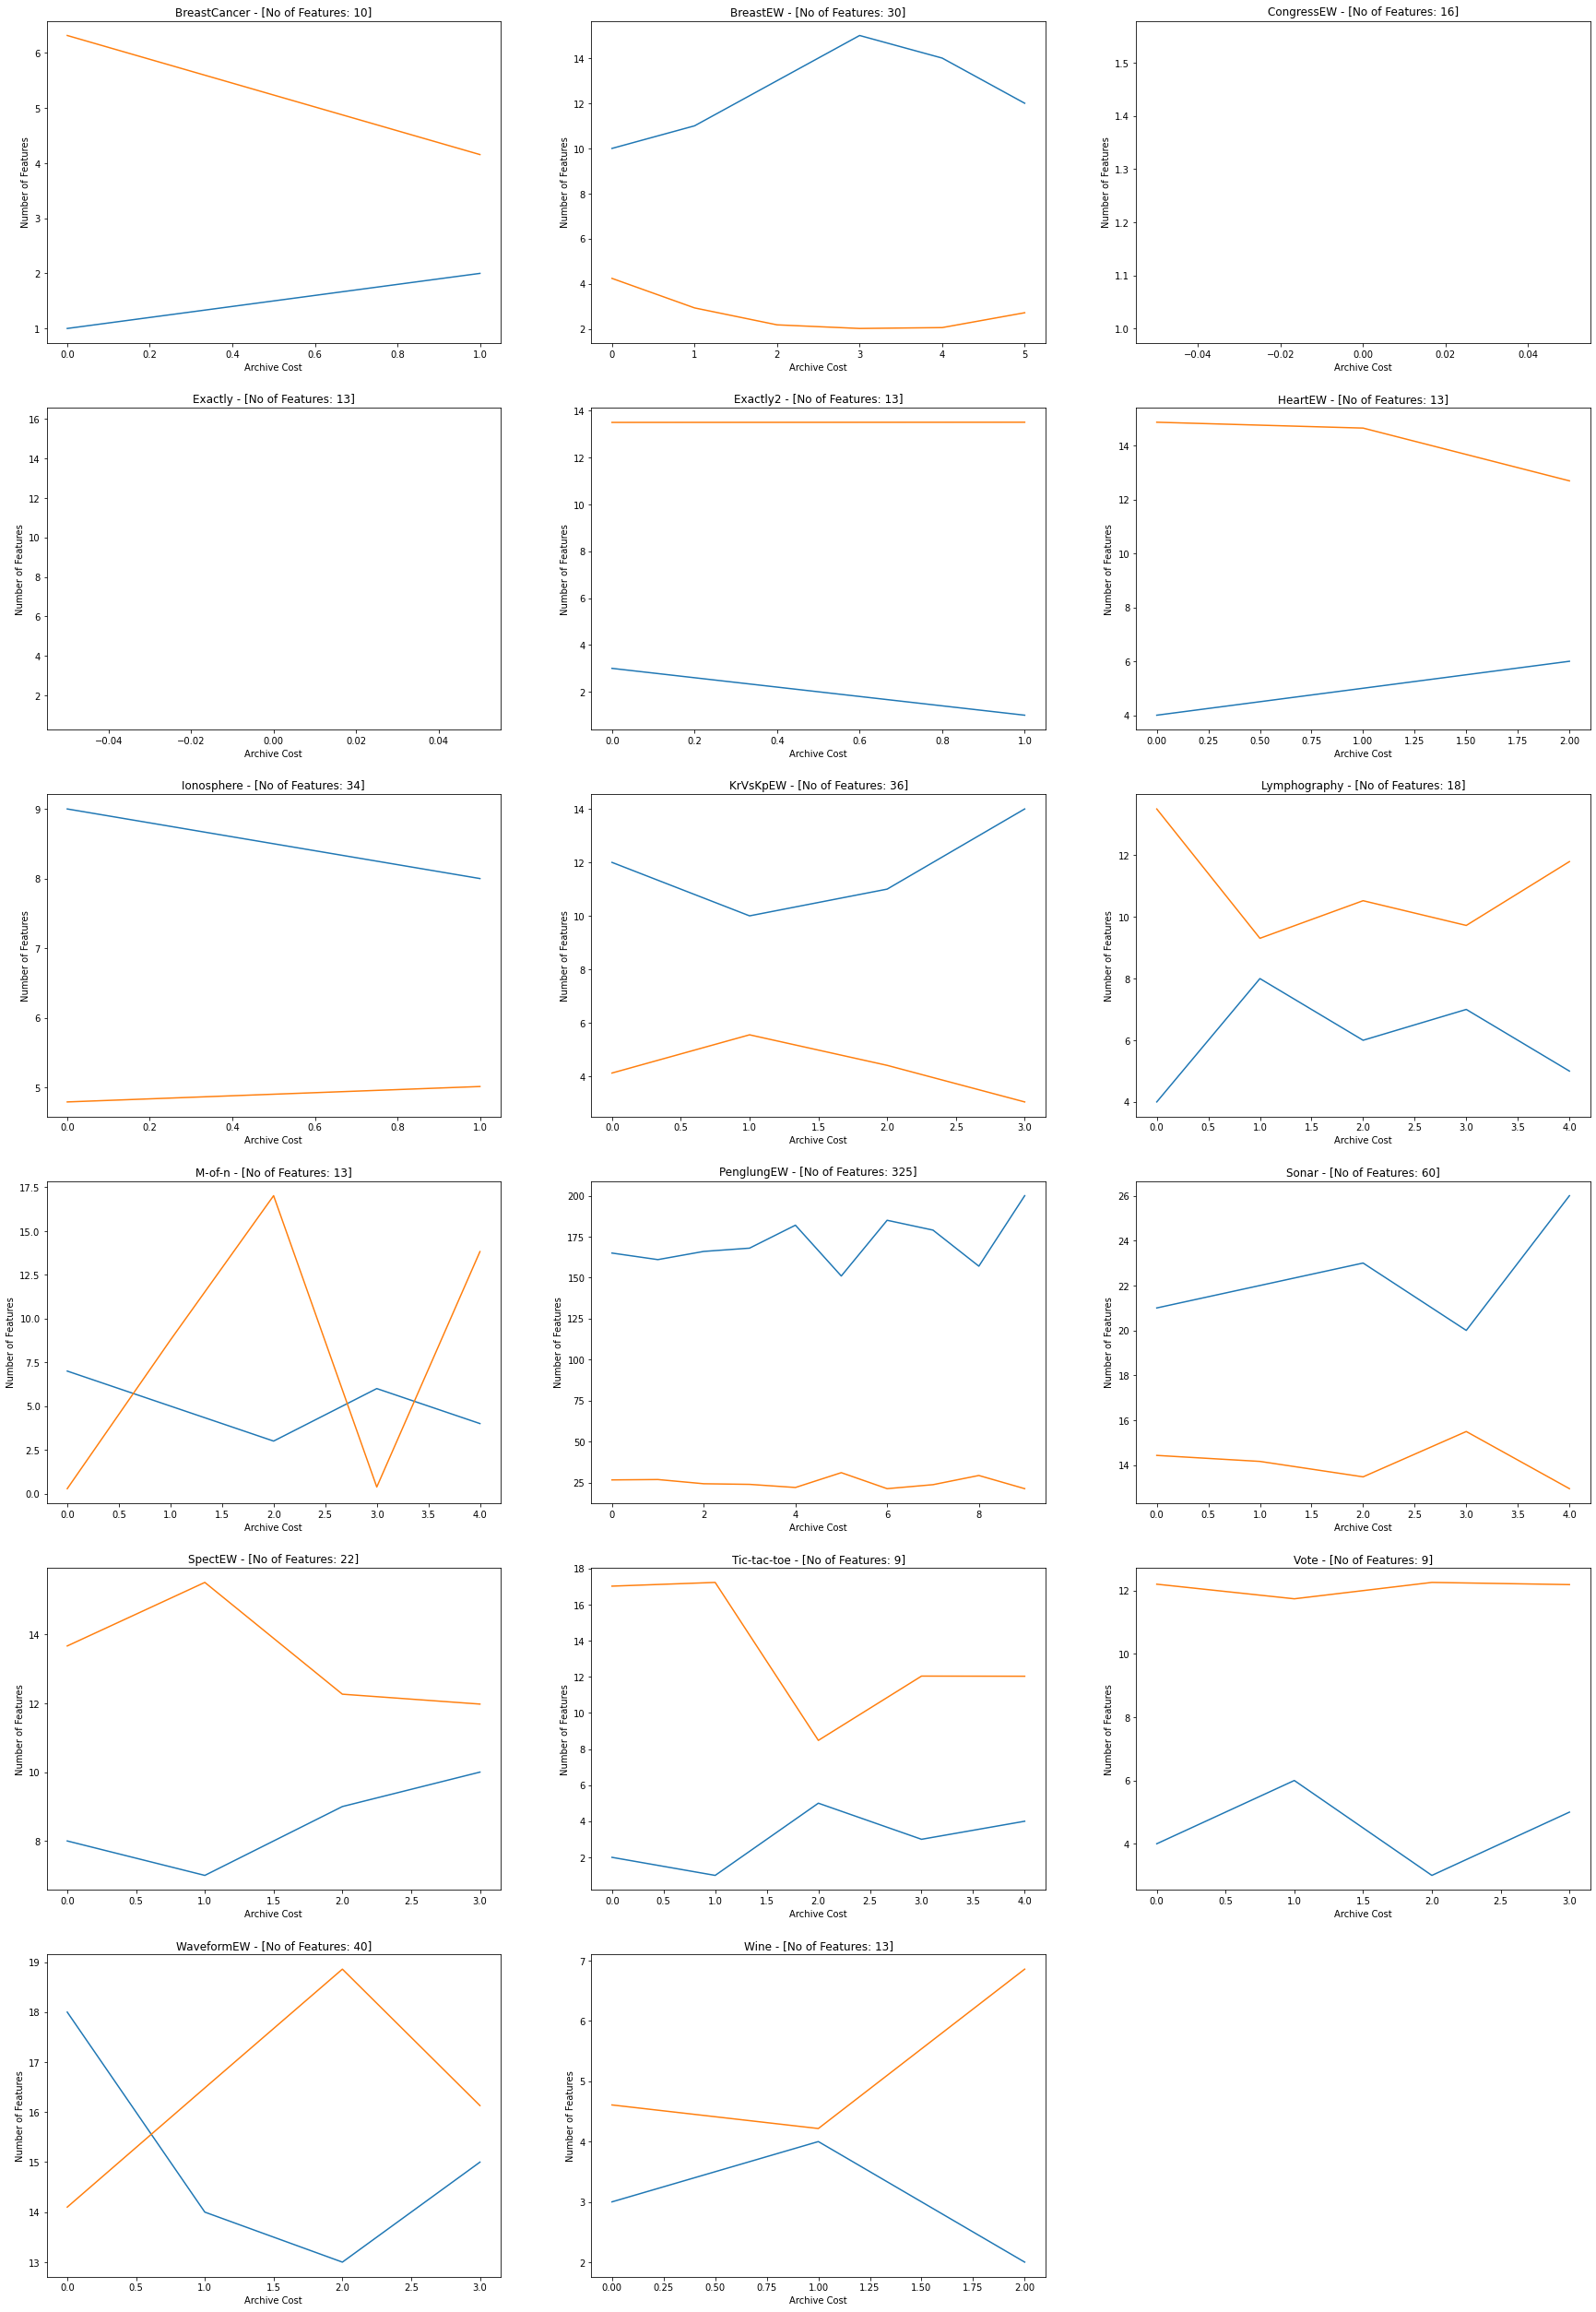

In [166]:
plot_archivecost(100,Datasets,res_loc)